In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

#### Find the most recent date in the data set.

In [9]:
last_date = session.query(func.max(Measurement.date)).all()
last_date 

[('2017-08-23')]

#### Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. Note you do not pass in the date as a variable to your query. 
#### Select only the date and prcp values.

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= '2016-08-23').order_by(Measurement.date.desc()).all()
results


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

### Load the query results into a Pandas DataFrame and set the index to the date column.

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column

results_df = pd.DataFrame(results)
results_df = results_df.rename(columns = {"date" :"Date", "prcp" : "Precipitation"})
results_df = results_df.set_index('Date')
results_df.head()



,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


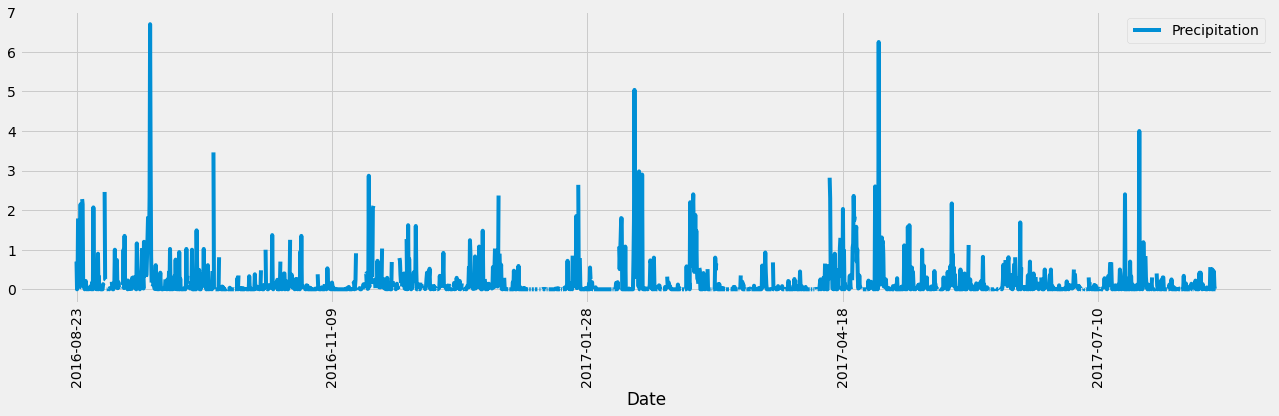

In [34]:
# Sort the dataframe by date
sorted_df = results_df.sort_values('Date')
sorted_df.head()

# Use Pandas Plotting with Matplotlib to plot the data


sorted_df.plot(figsize = (20,5))
plt.xticks(rotation = 90)
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset

stations = session.query(Station.id).count()
print (f'There are {stations} total stations in the dataset')

There are 9 total stations in the dataset


In [15]:
station_name = session.query(Station.name).all()
station_name

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

### Design a query to find the most active stations (i.e. which stations have the most rows?).

#### List the stations and observation counts in descending order.

#### Which station id has the highest number of observations?

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(func.count(Measurement.id), Station.station, Station.name).filter(Station.station == Measurement.station).group_by(Station.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

#Waihee  is the nost active station with 2772 rows 

[(2772, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (2724, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2709, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (2669, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (2612, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 (2202, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (1979, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (1372, 'USC00517948', 'PEARL CITY, HI US'),
 (511, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')]

### Waihee "USC00519281" is the nost active station with 2772 rows 

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
waihee_st = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Station.station == 'USC00519281').all()
type(waihee_st)

print(f' Lowest temp: {waihee_st[0][0]}')
print(f' Highest temp: {waihee_st[0][1]}')
print(f' Average temp: {waihee_st[0][2]}')

 Lowest temp: 53.0
 Highest temp: 87.0
 Average temp: 73.09795396419437


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

waihee_obvs = session.query(Measurement.date, Measurement.tobs).filter(Station.station == 'USC00519281').filter(Measurement.date >= '2016-08-23').all()
waihee_obvs

waihee_df = pd.DataFrame(waihee_obvs)
waihee_df = waihee_df.set_index('date')
waihee_df.head()


,tobs
date,
2016-08-23,81.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

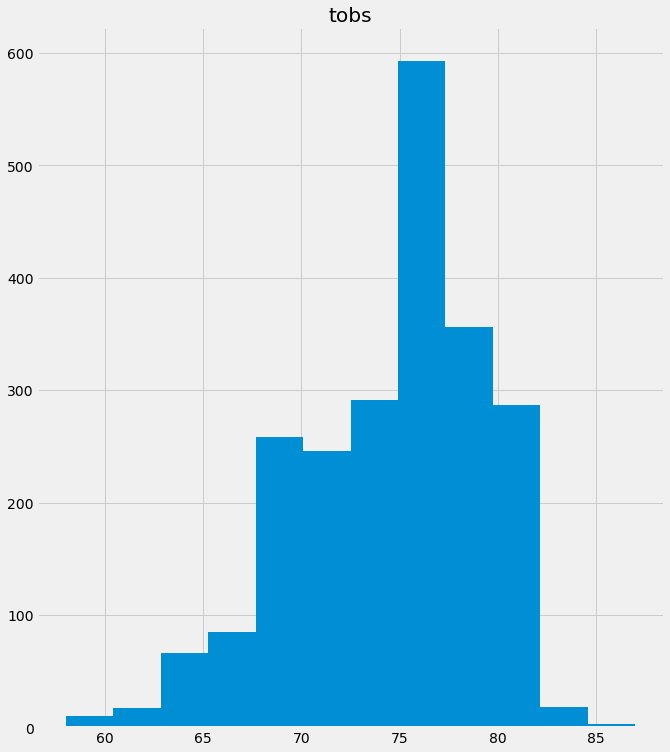

In [43]:
waihee_df.hist(bins = 12, grid = True, figsize = (10,12), label = "Temperature Obvs")

# Close session

In [20]:
# Close Session
session.close()